In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values to [0,1]
    rotation_range=20,        # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Shear transformation
    zoom_range=0.2,           # Zoom in randomly
    horizontal_flip=True,     # Flip images horizontally
    fill_mode='nearest'       # Fill pixels after transformations
)

In [22]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
path = r"C:\Users\MGM\Desktop\Ml-Project"

In [28]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


C:\Users\MGM\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - accuracy: 0.4494 - loss: 0.9806 - val_accuracy: 0.5273 - val_loss: 0.6625
Epoch 2/20
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.5938 - loss: 0.8289

C:\Users\MGM\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5938 - loss: 0.8289 - val_accuracy: 0.6875 - val_loss: 0.5762
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.7038 - loss: 0.5873 - val_accuracy: 0.8398 - val_loss: 0.3828
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7812 - loss: 0.5322 - val_accuracy: 0.6797 - val_loss: 0.5693
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.7386 - loss: 0.5359 - val_accuracy: 0.7031 - val_loss: 0.5741
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6562 - loss: 0.6281 - val_accuracy: 0.7656 - val_loss: 0.4463
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 260ms/step - accuracy: 0.8388 - loss: 0.3833 - val_accuracy: 0.7969 - val_loss: 0.3740
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8750 - loss: 0.2948 - val_accuracy: 0.8594 - val_loss: 0.3253
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - accuracy: 0.9123 - loss: 0.2645 - val_accuracy: 0.8164 - val_loss: 0.4552
Epoch 1

In [30]:
model.save('animal_classifier_model.h5')

In [42]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_animal(img_path):
    # Load image with correct target size (128x128 as per training)
    img = image.load_img(img_path, target_size=(128, 128))
    # Convert image to array and scale pixel values
    img_array = image.img_to_array(img) / 255.0
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    
    # Map class index to label
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class_index]

    return predicted_label

# Provide correct path
img_path = r"C:\Users\MGM\Desktop\Ml-Project\Bird\Bird_1.jpeg"

# Predict
print(f"Predicted animal: {predict_animal(img_path)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted animal: Bird


In [44]:
img_path = rimg_path = r"C:\Users\MGM\Desktop\Ml-Project\Bird\Bird_1.jpeg"
print(f"Predicted animal: {predict_animal(img_path)}")
print(f"Predicted animal: {predict_animal(img_path)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted animal: Bird
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted animal: Bird


In [46]:
img_path = r"C:\Users\MGM\Desktop\Ml-Project\Panda\Panda_3.jpg"
print(f"Predicted animal: {predict_animal(img_path)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted animal: Panda


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


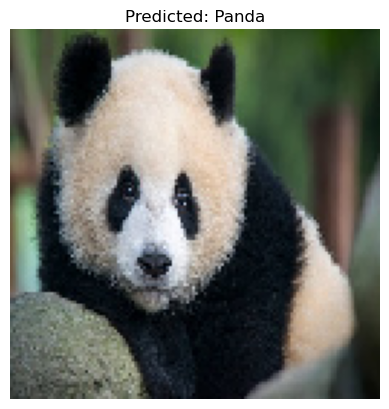

In [52]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_and_show(img_path):
    # Load and preprocess image with correct target size
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class_index]

    # Show image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Example usage
img_path = r"C:\Users\MGM\Desktop\Ml-Project\Panda\Panda_3.jpg"
predict_and_show(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


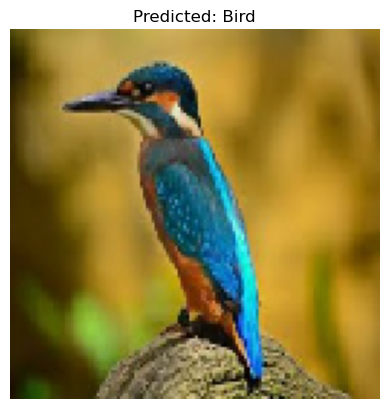

In [54]:
img_path = rimg_path = r"C:\Users\MGM\Desktop\Ml-Project\Bird\Bird_1.jpeg"
predict_and_show(img_path)

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(accuracy_score)
print(confusion_matrix)
print(classification_report)

<function accuracy_score at 0x000001AA4F99C900>
<function confusion_matrix at 0x000001AA4F99CA40>
<function classification_report at 0x000001AA4F99DDA0>


In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# True and predicted labels
y_true = validation_generator.classes
y_pred_probs = model.predict(validation_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = y_pred[:len(y_true)]

# Accuracy and Confusion Matrix
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# ✅ FIX: Only use target names for classes that appear in predictions
class_indices = validation_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}
used_class_indices = sorted(np.unique(y_pred))
filtered_labels = [index_to_class[i] for i in used_class_indices]

# Classification report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=filtered_labels))


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
Accuracy: 0.4632352941176471
Confusion Matrix:
 [[55 82]
 [64 71]]
Classification Report:
               precision    recall  f1-score   support

        Bird       0.46      0.40      0.43       137
       Panda       0.46      0.53      0.49       135

    accuracy                           0.46       272
   macro avg       0.46      0.46      0.46       272
weighted avg       0.46      0.46      0.46       272

